# Reflexer Model & Simulation

In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from run import run

In [13]:
df = run(True)
df = df[df.subset == 1]
df


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (50, 2, 2, 6)
Execution Method: local_simulations
SimIDs   : [0, 0]
SubsetIDs: [0, 1]
Ns       : [0, 1]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 0.10s


,timestep,latest_deviation_type,time_since_deviation,target_rate,target_price,market_price,simulation,subset,run,substep
51,0,0,0,0.000000e+00,1.000000,1.000000,0,1,1,0
52,1,0,0,0.000000e+00,1.000000,1.000000,0,1,1,1
53,2,0,0,0.000000e+00,1.000000,1.000000,0,1,1,1
54,3,0,0,0.000000e+00,1.000000,1.000000,0,1,1,1
55,4,0,0,0.000000e+00,1.000000,1.000000,0,1,1,1
56,5,0,0,0.000000e+00,1.000000,1.000000,0,1,1,1
57,6,0,0,0.000000e+00,1.000000,1.100000,0,1,1,1
58,7,-1,0,-9.090909e-04,1.000000,1.200000,0,1,1,1
59,8,-1,0,-1.666667e-03,0.986364,1.300000,0,1,1,1
60,9,-1,0,-2.412587e-03,0.961364,1.400000,0,1,1,1


In [11]:
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

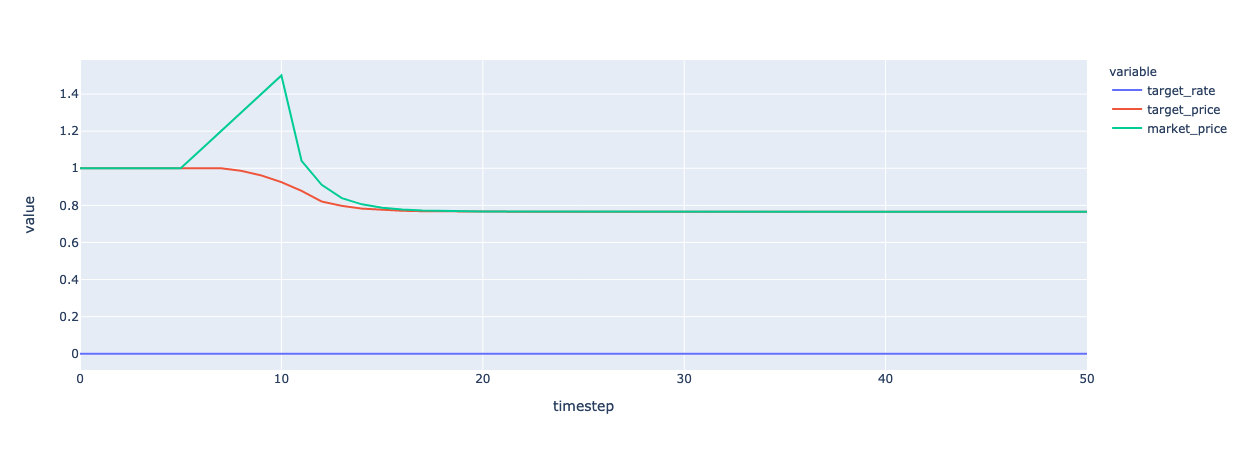

In [12]:
df.plot(kind='line', x='timestep', y=['target_rate', 'target_price', 'market_price'])